## Observations and Insights 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Checking the number of mice in the DataFrame.
Mouse_Count=len(combined_data["Mouse ID"].unique())

print(f"There are {Mouse_Count} mice within the DataFrame.")

There are 249 mice within the DataFrame.


In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_data.loc[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
optional = combined_data[combined_data["Mouse ID"] == "g989"] 
optional

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"].isin(duplicate) == False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Checking the number of mice in the clean DataFrame.
clean_count = len(clean_data["Mouse ID"].unique())

print(f"There are {clean_count} mice in the clean DataFrame.")

There are 248 mice in the clean DataFrame.


## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen.
summary_stats_data = clean_data.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean = summary_stats_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = summary_stats_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = summary_stats_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd = summary_stats_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = summary_stats_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({"Mean Tumor Value": mean, "Median Tumor Value": median, "Variance": variance, "SD": sd, 
                            "SEM": sem})
summary_stats

# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean Tumor Value,Median Tumor Value,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen.
summary_stats_data = clean_data.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean = summary_stats_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = summary_stats_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = summary_stats_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd = summary_stats_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem = summary_stats_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({"Mean Tumor Value": mean, "Median Tumor Value": median, "Variance": variance, "SD": sd, 
                            "SEM": sem})
summary_stats
# This method produces everything in a single groupby function.

,Mean Tumor Value,Median Tumor Value,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

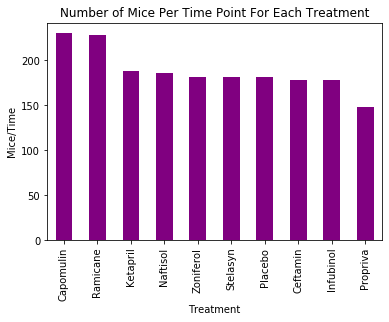

In [28]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
# using pandas.

per_time = clean_data["Drug Regimen"].value_counts()
y_axis = per_time.values
x_axis = per_time.index
per_time.plot(kind = "bar", facecolor = 'purple',)
plt.ylabel("Mice/Time")
plt.xlabel("Treatment")
plt.title("Number of Mice Per Time Point For Each Treatment")
plt.xticks(rotation = 90)
plt.show()

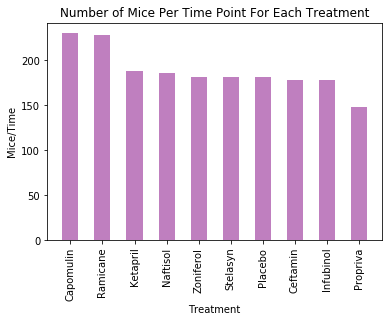

In [29]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
# using pyplot.

per_time = clean_data["Drug Regimen"].value_counts()
y_axis = per_time.values
x_axis = np.arange(0,len(y_axis),1)
x_drugs = per_time.index
plt.bar(x_drugs, y_axis, color = "purple", alpha = 0.5, align = "center", width = .5)

#Format
plt.ylabel("Mice/Time")
plt.xlabel("Treatment")
plt.title("Number of Mice Per Time Point For Each Treatment")
plt.xticks(rotation = 90)
plt.show()

## Pie Plots

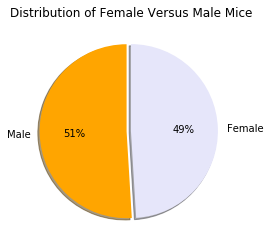

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mf_count = clean_data["Sex"].value_counts()
labels = mf_count.values
sizes = mf_count.values
colors = ["orange", "lavender"]
explode = [0.05,0]
mf_count.plot(kind = "pie", explode=explode, colors=colors, autopct="%1.0f%%", shadow = True, startangle = 90)

#Format
plt.title("Distribution of Female Versus Male Mice")
plt.ylabel(" ")
plt.show()

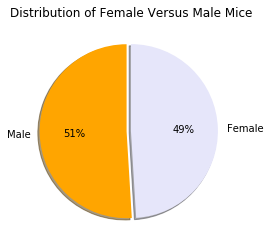

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_count = clean_data["Sex"].value_counts()
labels = mf_count.index
sizes = mf_count.values
colors = ["orange", "lavender"]
explode = [0.05,0]
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = "%1.0f%%", shadow = True, 
        startangle = 90)

#Format
plt.title("Distribution of Female Versus Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the 
# IQR and quantitatively determine if there are any potential outliers. 
final_tumor = clean_data.groupby("Mouse ID").max().reset_index()

tumor_data = final_tumor[["Mouse ID", "Timepoint"]].merge(clean_data, on=["Mouse ID","Timepoint"], how = "left")
tumor_data.round(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a262,45,Placebo,Female,17,29,70.72,4
3,a275,45,Ceftamin,Female,20,28,63.00,3
4,a366,30,Stelasyn,Female,16,29,63.44,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.71,0
244,z578,45,Ramicane,Male,11,16,30.64,0
245,z581,45,Infubinol,Female,24,25,62.75,3
246,z795,45,Naftisol,Female,13,29,65.74,3


In [15]:
# 4 Promising Regiments: Capomulin, Ramicane, Infubinol, Ceftamin
capomulin = tumor_data.loc[tumor_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ramicane = tumor_data.loc[tumor_data["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
infubinol = tumor_data.loc[tumor_data["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin = tumor_data.loc[tumor_data["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

# Capomulin quartiles
quartile_cap = capomulin.quantile([.25,.5,.75])
lower_cap = quartile_cap[.25]
upper_cap = quartile_cap[.75]
iqr = upper_cap - lower_cap

# Capomulin Outliers
lower_ocap = lower_cap - (1.5*iqr)
upper_ocap = upper_cap + (1.5*iqr)

# Ramicane quartiles
quartile_ram = ramicane.quantile([.25,.5,.75])
lower_ram = quartile_ram[.25]
upper_ram = quartile_ram[.75]
iqr = upper_ram - lower_ram

#Ramicane Outliers
lower_oram = lower_ram - (1.5*iqr)
upper_oram = upper_ram + (1.5*iqr)

# Infubionol quartiles
quartile_in = infubinol.quantile([.25,.5,.75])
lower_in = quartile_in[.25]
upper_in = quartile_in[.75]
iqr = upper_in - lower_in

# Infubionol Outliers
lower_oin = lower_in - (1.5*iqr)
upper_oin = upper_in + (1.5*iqr)

# Ceftamin quartiles
quartile_ce = ceftamin.quantile([.25,.5,.75])
lower_ce = quartile_ce[.25]
upper_ce = quartile_ce[.75]
iqr = upper_ce - lower_ce

# Ceftamin Outliers
lower_oce = lower_ce - (1.5*iqr)
upper_oce = upper_ce + (1.5*iqr)

print(f"Any number below {round(lower_ocap, 2)}(mm3) is a Capomulin outlier.")
print(f"Any number above {round(upper_ocap, 2)}(mm3) is a Capomulin outlier.")
print()
print(f"Any number below {round(lower_oram, 2)}(mm3) is a Ramicane outlier.")
print(f"Any number above {round(upper_oram, 2)}(mm3) is a Ramicane outlier.")
print()
print(f"Any number below {round(lower_oin, 2)}(mm3) is a Infubionol outlier.")
print(f"Any number above {round(upper_oin, 2)}(mm3) is a Infubionol outlier.")
print()
print(f"Any number below {round(lower_oce, 2)}(mm3) is a Ceftamin outlier.")
print(f"Any number above {round(upper_oce, 2)}(mm3) is a Ceftamin outlier.")

Any number below 20.7(mm3) is a Capomulin outlier.
Any number above 51.83(mm3) is a Capomulin outlier.

Any number below 17.91(mm3) is a Ramicane outlier.
Any number above 54.31(mm3) is a Ramicane outlier.

Any number below 36.83(mm3) is a Infubionol outlier.
Any number above 82.74(mm3) is a Infubionol outlier.

Any number below 25.36(mm3) is a Ceftamin outlier.
Any number above 87.67(mm3) is a Ceftamin outlier.


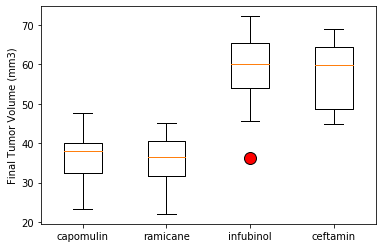

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_boxplot = dict(markerfacecolor = "red", markersize=12)

#Make Box Plot
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["capomulin", "ramicane", "infubinol", "ceftamin"], 
            flierprops = tumor_boxplot)

#Formatting
plt.title("")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

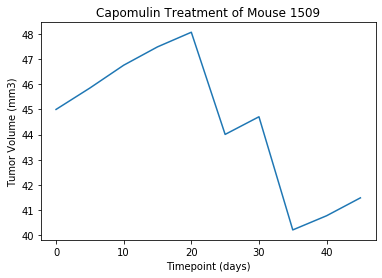

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_line = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
mouse = clean_data.loc[clean_data["Mouse ID"] == "l509"]

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse 1509")
plt.show()

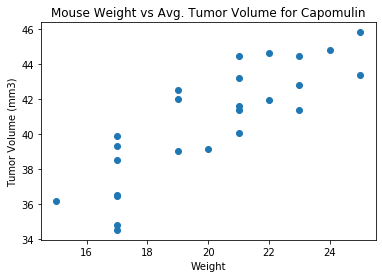

In [36]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight= clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]

capomulin_avg = mouse_weight.groupby(["Mouse ID"]).mean()

plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Avg. Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

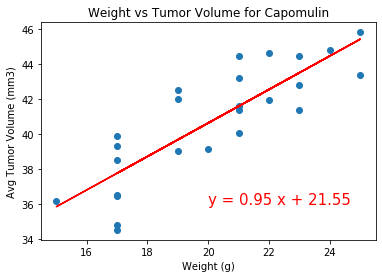

In [57]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the 
# Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr)= linregress(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
regress_values = capomulin_avg["Weight (g)"]* slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"] )
plt.plot(capomulin_avg["Weight (g)"], regress_values, color = "red")
plt.annotate(line_eq,(20,36), color = "red", fontsize = 15)
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

In [52]:
print(f" The Correlation between these two variables is {round(rvalue,2)}")

 The Correlation between these two variables is 0.84


In [60]:
print(f" The Linear Regression Model is {line_eq}")

 The Linear Regression Model is y = 0.95 x + 21.55
